The same plots on the website, but using matplotlib

In [1]:
%cd ~/dv/sns-chops/resolution/ARCS/
import os, numpy as np

/SNS/users/lj7/dv/sns-chops/resolution/ARCS


In [2]:
import pandas as pd
import numpy as np
import scipy as sp

In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt

# Get data

In [4]:
import resolution_plot
reload(resolution_plot)

<IPython.core.display.Javascript object>

<module 'resolution_plot' from 'resolution_plot.pyc'>

In [5]:
fc1data = resolution_plot.ExpData('./V_Cali_Int_Res_FC1_2018_v2.dat')

reading data. please wait...
  done


In [6]:
fc2data = resolution_plot.ExpData('./V_Cali_Int_Res_FC2_2018_v2.dat')

reading data. please wait...
  done


In [7]:
fc1_highres_data = resolution_plot.ExpData('./V_Cali_Int_Res_FC1_HighRes_2018_v2.dat')

reading data. please wait...
  done


In [8]:
unique_nominal_Eis = set( list(fc1data.Ei_list) + list(fc2data.Ei_list) + list(fc1_highres_data.Ei_list) )

In [9]:
unique_nominal_Eis = sorted(list(unique_nominal_Eis))

In [10]:
vscatt_scale = 2.5e4
vscatt_scale *= 60/1.4 # correct for  1. per pulse to per second 2. add per MW

## Automatic intensity settings

In [11]:
datamap = {1: fc1data, 2: fc2data}

auto_flux_data = {}
for fc in range(1, 2+1):
    auto_flux_data[fc] = dict(fwhms=list(), ints=list(), Eis=list(), labels=list())

# for Ei, Chopper, Speed, T0 in np.loadtxt('HighIntensitySetting-fixed.txt', delimiter=','):
for Ei, Chopper, Speed, T0 in np.loadtxt('./doug/new_Ei_high_flux.csv', delimiter=','):
    chopper = int(Chopper)
    # print chopper
    data = datamap[Chopper]
    condition1 = np.logical_and(np.isclose(data.vdata.Energy, Ei), np.isclose(data.chopper_freqs, Speed))
    condition1 = np.logical_and(condition1, data.vdata.RunNumber!=107639) # manually skip a duplicate measurement
    condition1 = np.logical_and(condition1, data.vdata.RunNumber!=107635) # manually skip a duplicate measurement

    # print fc1data.vdata.Chopper3[condition1]
    data1 = auto_flux_data[chopper]
    data1['fwhms'] += list(data.FWHM[condition1])
    data1['ints'] += list(data.intensity[condition1])
    Eis1 = list(data.vdata.Ei[condition1])
    data1['Eis'] += Eis1
    data1['labels'] += ['Chopper %d - Speed %s' % (Chopper, Speed)] * len(Eis1)
    continue
# highint_Eis = Eis
# highint_ints = ints
# highint_FWHMs = fwhms
# highint_labels = labels

## High resolution settings data

In [12]:
datamap = {1: fc1data, 2: fc2data}

auto_res_data = {}
for fc in range(1, 2+1):
    auto_res_data[fc] = dict(fwhms=list(), ints=list(), Eis=list(), labels=list())

# for Ei, Chopper, Speed, T0 in np.loadtxt('HighResSetting.txt', delimiter=','):
for Ei, Chopper, Speed, T0 in np.loadtxt('./doug/new_Ei_high_res.csv', delimiter=','):
    data = datamap[Chopper]
    condition1 = np.logical_and(np.isclose(data.vdata.Energy, Ei), np.isclose(data.chopper_freqs, Speed))
    condition1 = np.logical_and(condition1, data.vdata.RunNumber!=107639) # manually skip a duplicate measurement
    condition1 = np.logical_and(condition1, data.vdata.RunNumber!=107635) # manually skip a duplicate measurement
    
    # print fc1data.vdata.Chopper3[condition1]
    data1 = auto_res_data[Chopper]
    data1['fwhms'] += list(data.FWHM[condition1])
    data1['ints'] += list(data.intensity[condition1])
    Eis1 = list(data.vdata.Ei[condition1])
    data1['Eis'] += Eis1
    data1['labels'] += ['Chopper %d - Speed %s' % (Chopper, Speed)] * len(Eis1)
    continue
# highres_Eis = Eis
# highres_FWHMs =  fwhms
# highres_ints = ints
# highres_labels = labels

In [13]:
# highres_labels

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# Intensity vs FWHM

In [15]:
fc1data.vdata.RunNumber

0      107520.0
1      107521.0
2      107522.0
3      107523.0
4      107524.0
5      107525.0
6      107526.0
7      107527.0
8      107528.0
9      107529.0
10     107530.0
11     107531.0
12     107532.0
13     107533.0
14     107534.0
15     107535.0
16     107536.0
17     107537.0
18     107538.0
19     107539.0
20     107540.0
21     107541.0
22     107542.0
23     107543.0
24     107544.0
25     107545.0
26     107546.0
27     107547.0
28     107548.0
29     107549.0
         ...   
268    107490.0
269    107491.0
270    107492.0
271    107493.0
272    107494.0
273    107495.0
274    107496.0
275    107497.0
276    107498.0
277    107499.0
278    107500.0
279    107501.0
280    107502.0
281    107503.0
282    107504.0
283    107505.0
284    107506.0
285    107507.0
286    107508.0
287    107509.0
288    107510.0
289    107511.0
290    107512.0
291    107513.0
292    107514.0
293    107515.0
294    107516.0
295    107517.0
296    107518.0
297    107519.0
Name: RunNumber, Length:

In [16]:
def plotFCData(fcdata, n_Ei, label, max_res_percentage, min_flux, marker, color, skip_freqs=[]):
    condition = np.logical_and(np.isclose(n_Ei, fcdata.vdata.Energy), 
                               fcdata.FWHM_percentages<max_res_percentage)
    condition = np.logical_and((fcdata.intensity*vscatt_scale) > min_flux, condition)
    condition = np.logical_and(condition, fcdata.vdata.RunNumber!=107635) # manually skip a duplicate measurement
    xs, ys = fcdata.FWHM[condition], fcdata.intensity[condition]*vscatt_scale
    plt.plot(xs, ys, color+marker, mfc='none', label=label)
    _label =  lambda freq: '%d Hz' % freq if freq not in skip_freqs else ''
    labels = [_label(freq) for freq in fcdata.chopper_freqs[condition] ]
    plttexts = [plt.text(x,y, label, color=color, fontsize=8) for label, x, y in zip(labels, xs, ys)]
    return plttexts
    #for label, x, y in zip(labels, xs, ys):
        #plt.annotate(
        #    label,
        #    xy=(x, y), xytext=(15, -10),
        #    textcoords='offset points', ha='right', va='bottom',
        #    color=color,
        #    # bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #    # arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        #)


In [17]:
from adjustText import adjust_text

<IPython.core.display.Javascript object>


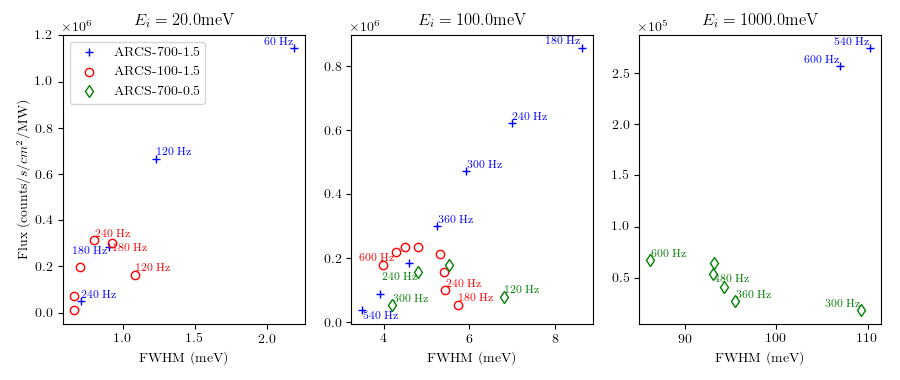

428.571428571
21428.5714286
428.571428571


In [18]:
Eis = unique_nominal_Eis #[:10]
Eis = [20., 100., 1000.]
title='ARCS flux (intensity) vs resolution Version 2 \nuse dropdown list from left to choose incident energy'
max_res_percentage_list = [11., 11., 11.5]
min_flux_list = np.array([10, 500, 10])*60./1.4

N = len(Eis)
# plt.figure(figsize=(4., 12))
plt.figure(figsize=(9, 3.8))

for i in range(N):
    n_Ei = Eis[i]; max_res_percentage = max_res_percentage_list[i]; min_flux=min_flux_list[i]
    print min_flux
    # plt.subplot(N, 1, i+1)
    plt.subplot(1, N, i+1)
    plt.title("$E_i=%s$meV" % n_Ei )
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.xlabel('FWHM (meV)')
    if i==0:
        plt.ylabel("Flux (counts/$s/cm^2$/MW)")
    plttexts = []
    plttexts += plotFCData(
        fc1data, n_Ei, 'ARCS-700-1.5', max_res_percentage, min_flux, marker = '+', color='b',
        skip_freqs = [420., 480.]
    )
    plttexts += plotFCData(
        fc2data, n_Ei, 'ARCS-100-1.5', max_res_percentage, min_flux, marker = 'o', color='r',
        skip_freqs = [300., 360., 420., 480., 540.]
    )
    plttexts += plotFCData(
        fc1_highres_data, n_Ei, 'ARCS-700-0.5', max_res_percentage, min_flux, marker = 'd', color='g',
        skip_freqs = [180., 540., 420.],
    )
    
    adjust_text(plttexts)
    if i==0:
        plt.legend()
    # break
plt.tight_layout()
plt.savefig("/SNS/users/lj7/tmp/Fig2.eps")

# {} vs Ei

In [20]:
# fc1data.vdata.Energy

In [23]:
datalist = [
    dict(name='ARCS-700-1.5', data=fc1data),
    dict(name='ARCS-100-1.5', data=fc2data),
    dict(name='ARCS-700-0.5', data=fc1_highres_data),
]

## Intensity vs Ei

<IPython.core.display.Javascript object>


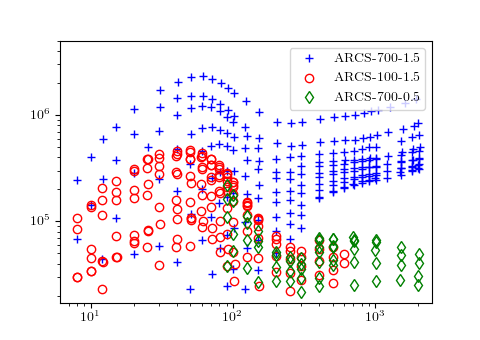

In [22]:
plt.figure(figsize=(4.8,3.4))


markers = '+', 'o', 'd'
colors = 'b', 'r', 'g'
for i, dataitem in enumerate(datalist):
    fcdata = dataitem['data']
    name = dataitem['name']
    labels = ['%s - %sHz' % (name, freq) for freq in fcdata.chopper_freqs]
    flux = fcdata.intensity*vscatt_scale
    good = np.logical_and(flux>500*60/1.4, fcdata.vdata.Ei< 2100)
    # plt.semilogx(fcdata.vdata.Ei[good], flux[good], markers[i], mfc='none', label=name)
    plt.loglog(fcdata.vdata.Ei[good], flux[good], markers[i], color=colors[i], mfc='none', label=name)
    continue

# plt.plot(highint_Eis, np.array(highint_ints)*vscatt_scale, 'k^', mfc='none', label='automatic flux')
# plt.plot(highres_Eis, np.array(highres_ints)*vscatt_scale, 'kv', mfc='none', label='automatic resolution')

plt.ylim(None, 5e6)
plt.xlim(None, 2500)
plt.legend()

## FWHM vs Ei

<IPython.core.display.Javascript object>


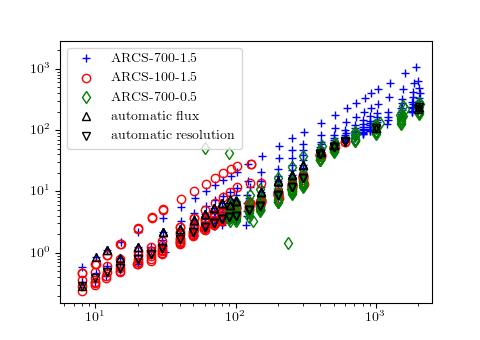

In [28]:
plt.figure(figsize=(4.8,3.4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

markers = 'b+', 'ro', 'gd'
for i, dataitem in enumerate(datalist):
    fcdata = dataitem['data']
    name = dataitem['name']
    labels = ['%s - %sHz' % (name, freq) for freq in fcdata.chopper_freqs ]
    good = np.logical_and(fcdata.intensity*vscatt_scale>100, fcdata.vdata.Ei<2100)
    plt.loglog(fcdata.vdata.Ei[good], fcdata.FWHM[good], markers[i], mfc='none', label=name)
    # plt.plot(fcdata.vdata.Ei[good], fcdata.FWHM[good], markers[i], mfc='none', label=name)
    continue
    
# plt.plot(highint_Eis, np.array(highint_FWHMs), 'k^', mfc='none', label='automatic flux')
# plt.plot(highres_Eis, np.array(highres_FWHMs), 'kv', mfc='none', label='automatic resolution')
plt.xlim(None, 2500)

plt.legend()

## Intensity vs Ei and FWHM vs Ei

<IPython.core.display.Javascript object>


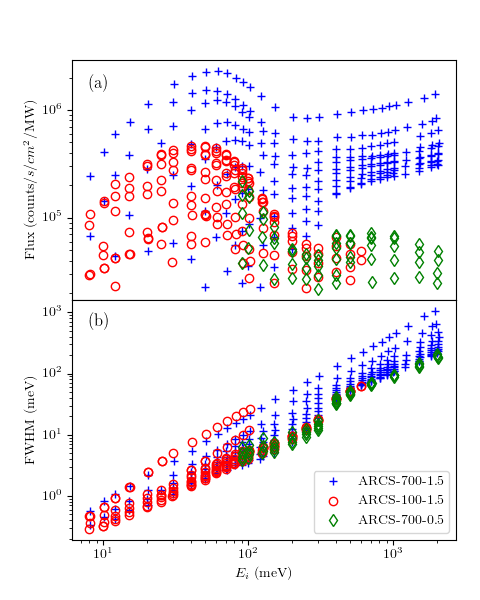

In [24]:
fig = plt.figure(figsize=(4.8,6))

ax1 = fig.add_axes([0.15, 0.5, 0.8, 0.4])
                   # xticklabels=[], ylim=(None, 1e7))
ax2 = fig.add_axes([0.15, 0.1, 0.8, 0.4])
                   # ylim=(None, 2e3))

markers = '+', 'o', 'd'
colors = 'b', 'r', 'g'

for i, dataitem in enumerate(datalist):
    fcdata = dataitem['data']
    name = dataitem['name']
    labels = ['%s - %sHz' % (name, freq) for freq in fcdata.chopper_freqs]
    flux = fcdata.intensity*vscatt_scale
    good = np.logical_and(flux>500*60/1.4, fcdata.vdata.Ei< 2100)
    # plt.semilogx(fcdata.vdata.Ei[good], flux[good], markers[i], mfc='none', label=name)
    ax1.loglog(fcdata.vdata.Ei[good], flux[good], markers[i], color=colors[i], mfc='none', label=name)
    continue

# plt.legend()
ax1.set_ylabel("Flux (counts/$s/cm^2$/MW)")
ax1.text(8, 1.6e6, '(a)', fontsize=12)
ax1.xaxis.set_visible(False)

markers = 'b+', 'ro', 'gd'
for i, dataitem in enumerate(datalist):
    fcdata = dataitem['data']
    name = dataitem['name']
    labels = ['%s - %sHz' % (name, freq) for freq in fcdata.chopper_freqs ]
    flux = fcdata.intensity*vscatt_scale
    good = np.logical_and(flux>500*60/1.4, fcdata.vdata.Ei<2100)
    ax2.loglog(fcdata.vdata.Ei[good], fcdata.FWHM[good], markers[i], mfc='none', label=name)
    # plt.plot(fcdata.vdata.Ei[good], fcdata.FWHM[good], markers[i], mfc='none', label=name)
    continue
ax2.set_ylabel("FWHM (meV)")
ax2.set_xlabel('$E_i$ (meV)')
ax2.text(8, 6e2, '(b)', fontsize=12)

ax2.legend(loc='lower right')
# fig.tight_layout()

plt.savefig("/SNS/users/lj7/tmp/Fig1.eps")

### Flux and resolution settings

<IPython.core.display.Javascript object>


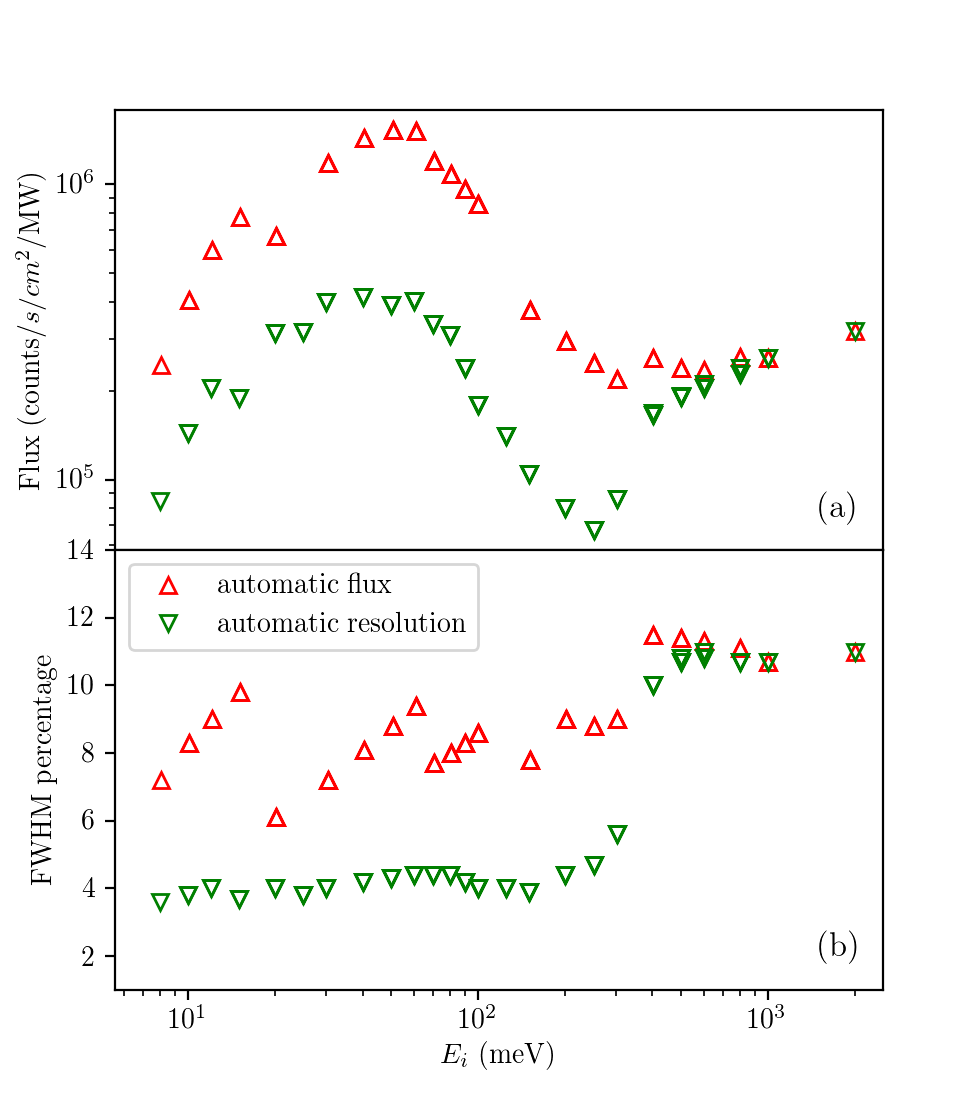

In [53]:
fig = plt.figure(figsize=(4.8,5.5))

ax1 = fig.add_axes([0.12, 0.5, 0.8, 0.4])
                   # xticklabels=[], ylim=(None, 1e7))
ax2 = fig.add_axes([0.12, 0.1, 0.8, 0.4])
                   # ylim=(None, 2e3))

highint_Eis = auto_flux_data[1]['Eis']
highint_ints = auto_flux_data[1]['ints']
ax1.loglog(highint_Eis, np.array(highint_ints)*vscatt_scale, 'r^', mfc='none', label='automatic flux')

highres_Eis = auto_res_data[1]['Eis'] + auto_res_data[2]['Eis']
highres_ints = auto_res_data[1]['ints'] + auto_res_data[2]['ints']
ax1.loglog(highres_Eis, np.array(highres_ints)*vscatt_scale, 'gv', mfc='none', label='automatic resolution')


# plt.legend()
ax1.set_ylabel("Flux (counts/$s/cm^2$/MW)")
ax1.text(1.5e3, 7.5e4, '(a)', fontsize=12)
ax1.set_xlim(None, 2.5e3)

highint_FWHMs = auto_flux_data[1]['fwhms']
highres_FWHMs = auto_res_data[1]['fwhms'] + auto_res_data[2]['fwhms']
ax2.semilogx(highint_Eis, np.array(highint_FWHMs)/highint_Eis*100, 'r^', mfc='none', label='automatic flux')
ax2.semilogx(highres_Eis, np.array(highres_FWHMs)/highres_Eis*100, 'gv', mfc='none', label='automatic resolution')
ax2.set_ylabel("FWHM percentage")
ax2.set_xlabel('$E_i$ (meV)')
ax2.text(1.5e3, 2, '(b)', fontsize=12)
ax2.set_xlim(None, 2.5e3)
ax2.set_ylim(1,14)

ax2.legend(loc='upper left')
# plt.tight_layout()

<IPython.core.display.Javascript object>


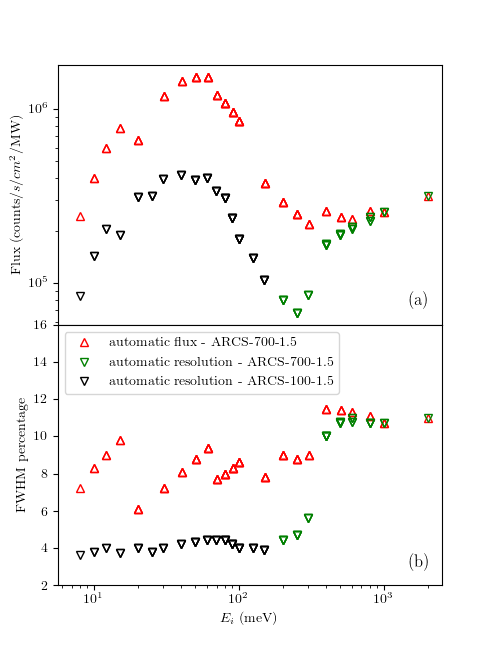

In [21]:
fig = plt.figure(figsize=(4.8,6.5))

ax1 = fig.add_axes([0.12, 0.5, 0.8, 0.4])
                   # xticklabels=[], ylim=(None, 1e7))
ax2 = fig.add_axes([0.12, 0.1, 0.8, 0.4])
                   # ylim=(None, 2e3))

ax1.loglog(auto_flux_data[1]['Eis'], np.array(auto_flux_data[1]['ints'])*vscatt_scale,
           'r^', mfc='none', label='automatic flux - ARCS-700-1.5')
ax1.loglog(auto_res_data[1]['Eis'], np.array(auto_res_data[1]['ints'])*vscatt_scale,
           'gv', mfc='none', label='automatic resolution - ARCS-700-1.5')
ax1.loglog(auto_res_data[2]['Eis'], np.array(auto_res_data[2]['ints'])*vscatt_scale,
           'kv', mfc='none', label='automatic resolution - ARCS-100-1.5')
ax1.xaxis.set_visible(False)

# plt.legend()
ax1.set_ylabel("Flux (counts/$s/cm^2$/MW)")
ax1.text(1.5e3, 7.5e4, '(a)', fontsize=12)
ax1.set_xlim(None, 2.5e3)

ax2.semilogx(auto_flux_data[1]['Eis'],
             np.array(auto_flux_data[1]['fwhms'])/auto_flux_data[1]['Eis']*100, 
             'r^', mfc='none', label='automatic flux  - ARCS-700-1.5')
ax2.semilogx(auto_res_data[1]['Eis'], np.array(auto_res_data[1]['fwhms'])/auto_res_data[1]['Eis']*100,
           'gv', mfc='none', label='automatic resolution - ARCS-700-1.5')
ax2.semilogx(auto_res_data[2]['Eis'], np.array(auto_res_data[2]['fwhms'])/auto_res_data[2]['Eis']*100,
           'kv', mfc='none', label='automatic resolution - ARCS-100-1.5')
ax2.set_ylabel("FWHM percentage")
ax2.set_xlabel('$E_i$ (meV)')
ax2.text(1.5e3, 3, '(b)', fontsize=12)
ax2.set_xlim(None, 2.5e3)
ax2.set_ylim(2,16)

ax2.legend(loc='upper left')
# plt.tight_layout()

plt.savefig("/SNS/users/lj7/tmp/Fig3.eps")